# Testing
## 15 October

status: -2147287040
180.0
180.0
Driver is created: 1 devices connected..
Device 0
	 {'index': 0, 'path:': b'\\\\?\\hid#vid_03eb&pid_2402#7&1fc8f206&0&0000#{4d1e55b2-f16f-11cf-88cb-001111000030}', 'version': 512, 'SN': '', 'product': 'PocketVNA', 'vendor': 'Martin', 'read': True, 'write': True}


NameError: name 'ph' is not defined

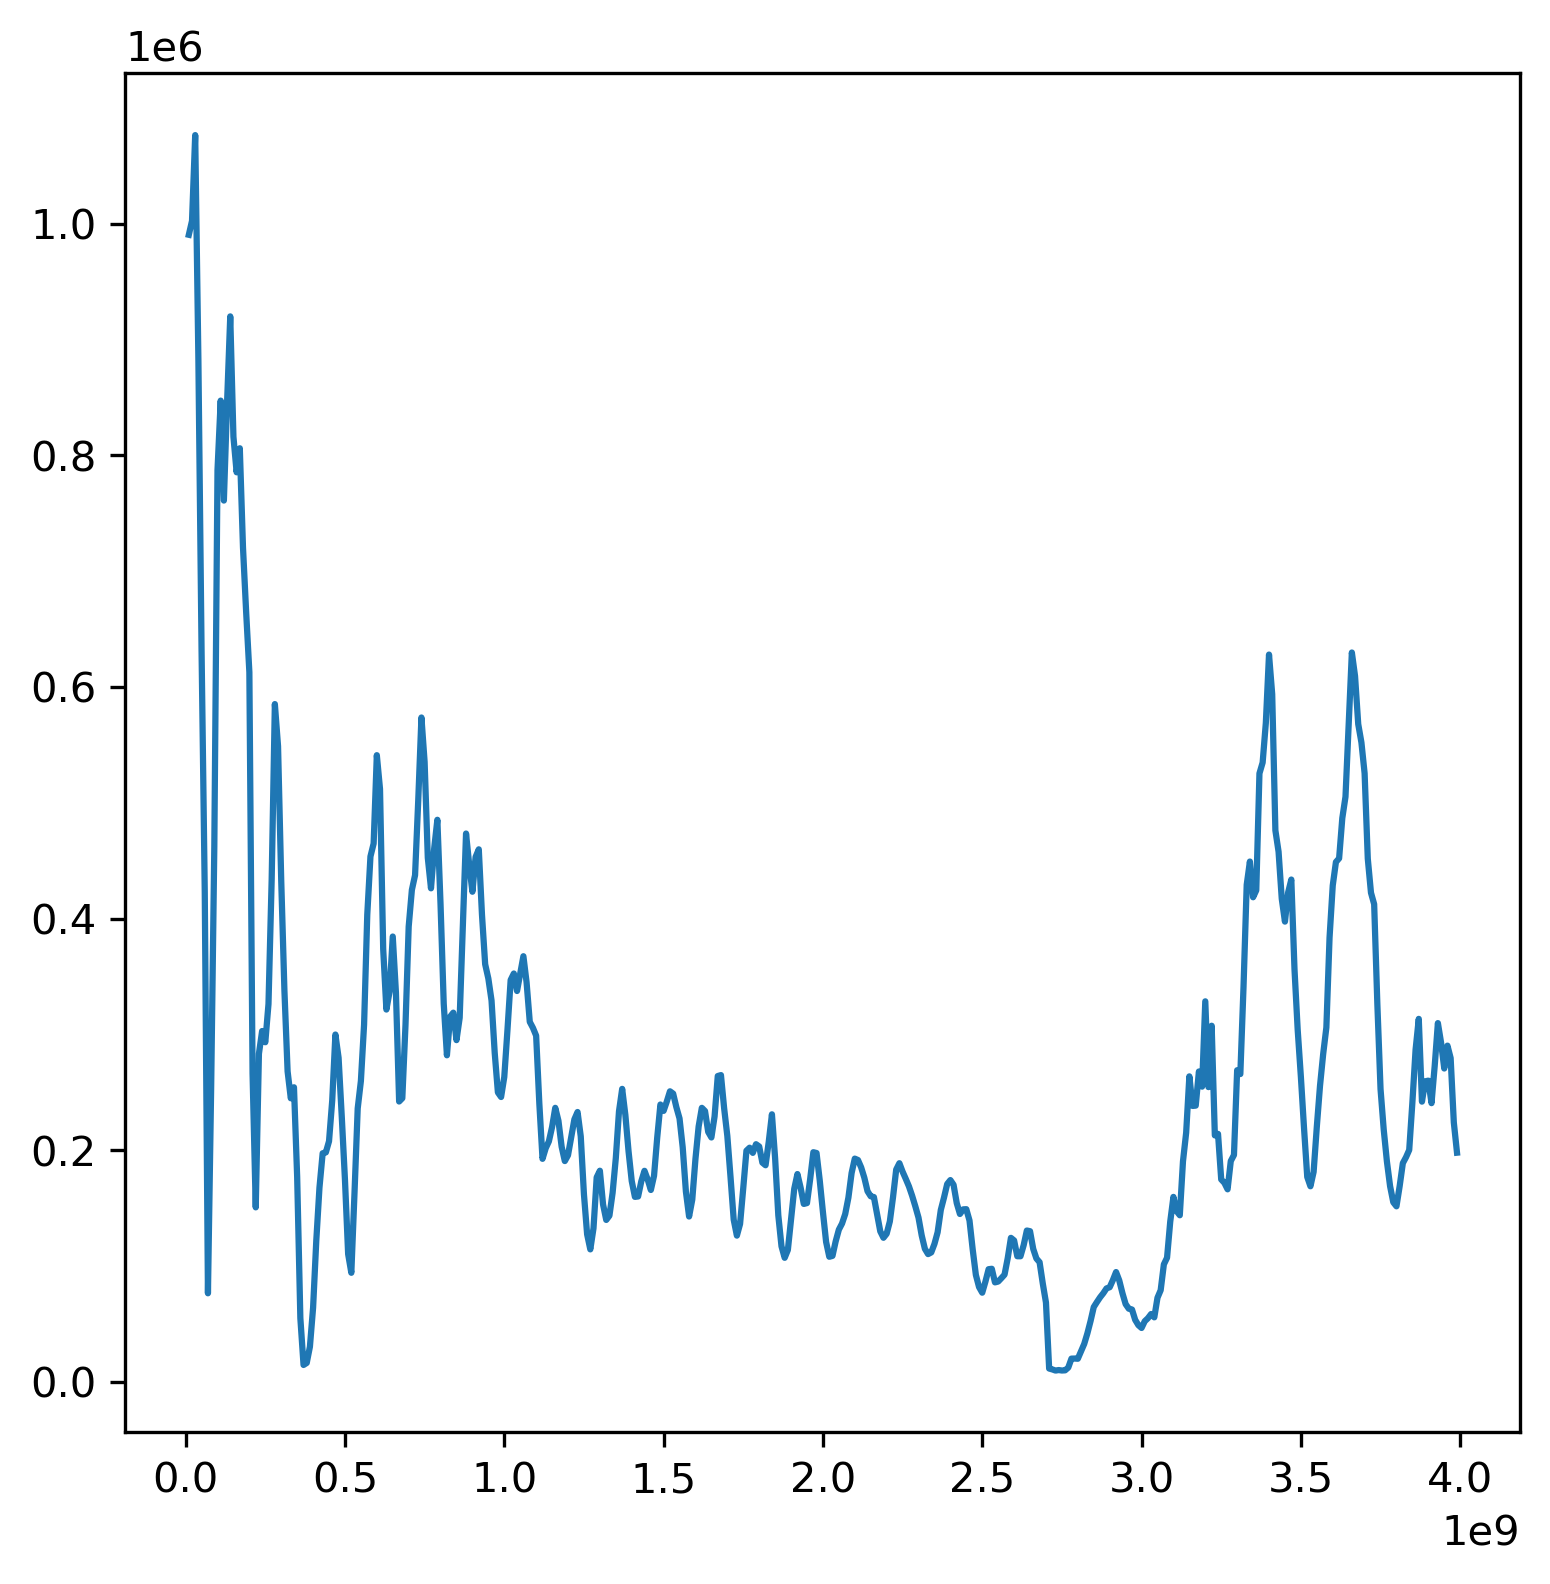

In [4]:
import pocketvna
import os
import numpy as np
import matplotlib.pyplot as plt
from stlab.devices.Vaunix_Phase import Vaunix_Phase

ph1 = Vaunix_Phase(19164)
print(ph1.GetPhase())
ph1.SetPhase(180)
print(ph1.GetPhase())

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 300

driver = pocketvna.Driver()

print('Driver is created: {} devices connected..'.format(driver.count()))
for i in range(0, driver.count()):
    print('Device {}'.format(i))
    print('\t {}'.format(driver.info_at(i)))
    
if not driver.connect_to(0):
    print('Failed to connect')
    exit()

average = 10

freq = np.arange(10000000, 4000000000, 10000000, dtype=np.uint64)

s11, s21, s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)

driver.close()
A_real = s21.real
A_imag = s21.imag

A = np.sqrt(A_real**2 + A_imag**2)

plt.plot(freq, A)


plt.show()

